<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Language     840 non-null    object 
 1   Program      840 non-null    object 
 2   PowerLimit   840 non-null    int64  
 3   Package      840 non-null    float64
 4   Core         840 non-null    float64
 5   GPU          840 non-null    object 
 6   DRAM         840 non-null    object 
 7   Time         840 non-null    int64  
 8   Temperature  840 non-null    float64
 9   Memory       840 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 65.8+ KB


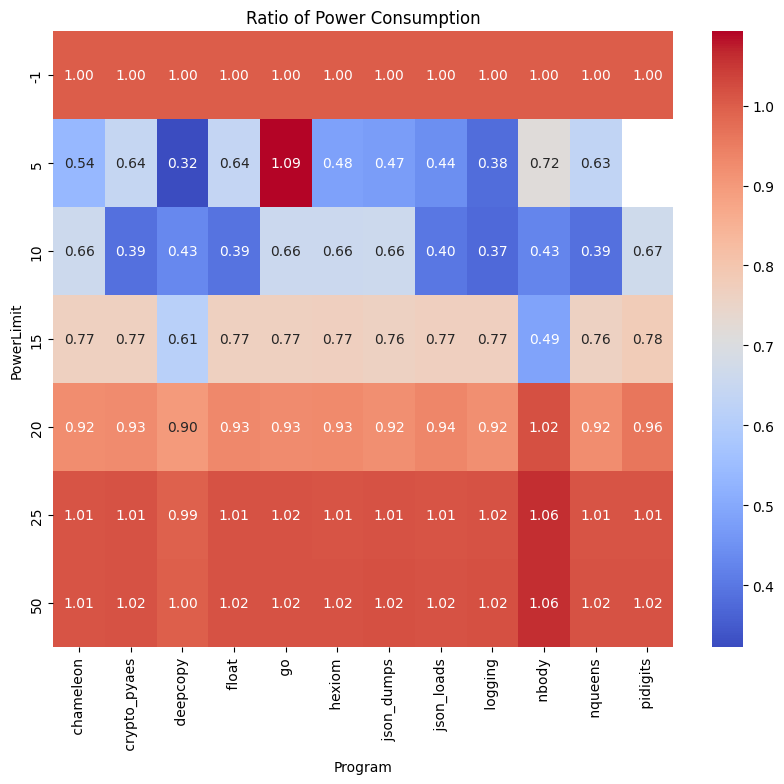

In [118]:

# importing the modules 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
    
data = pd.read_csv("measurementsGlobalPython3-11Old.csv")
data.info()
powerconsumed = data['Package']
time = (data['Time']/1000.0)
temperature = data['Temperature']
program = data['Program']
powerLimit = data['PowerLimit']


threshold = 3
df = pd.DataFrame({'Program': program, 'PowerLimit': powerLimit, 'Temperature': temperature, 'Energy Consumption': powerconsumed, 'Time': time})

# Recalculate mean after filtering outliers
filtered_df = df[(df['Time'].abs() < df['Time'].mean() + threshold * df['Time'].std()) & 
                (df['Energy Consumption'].abs() < df['Energy Consumption'].mean() + threshold * df['Energy Consumption'].std())]
grouped = filtered_df.groupby(['Program', 'PowerLimit']).mean().reset_index()


# Calculating the ratio between Time and Energy Consumption
#grouped['Ratio'] = grouped['Time'] / grouped['Energy Consumption']


# Getting the energy consumption at PowerLimit -1 for each program
baseline = grouped[grouped['PowerLimit'] == -1][['Program', 'Energy Consumption']]
baseline = baseline.rename(columns={'Energy Consumption': 'Baseline Consumption'})

# Merging the baseline values back into the grouped dataframe
grouped = pd.merge(grouped, baseline, on='Program')

# Calculating the ratio of energy consumption to the baseline
grouped['Ratio'] = grouped['Energy Consumption'] / grouped['Baseline Consumption']

# dfCorr = grouped[['PowerLimit','Temperature',"Time","Energy Consumption"]]
# dfCorr['PowerLimit'].replace(-1, 51, inplace=True)
# print(dfCorr)
# corr = dfCorr.corr()
# plt.figure(figsize=(11,8))
# sns.heatmap(corr, cmap="Greens",annot=True)
# plt.show()


# Pivoting the dataframe to create a matrix
heatmap_data = grouped.pivot(index="PowerLimit", columns="Program", values="Ratio")


# Plotting the heatmap
plt.figure(figsize=(10, 8))
hm = sns.heatmap(data=heatmap_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Ratio of Power Consumption')
plt.show()


Empty DataFrame
Columns: [Language, Program, PowerLimit, Package, Core, GPU, DRAM, Time, Temperature, Memory]
Index: []


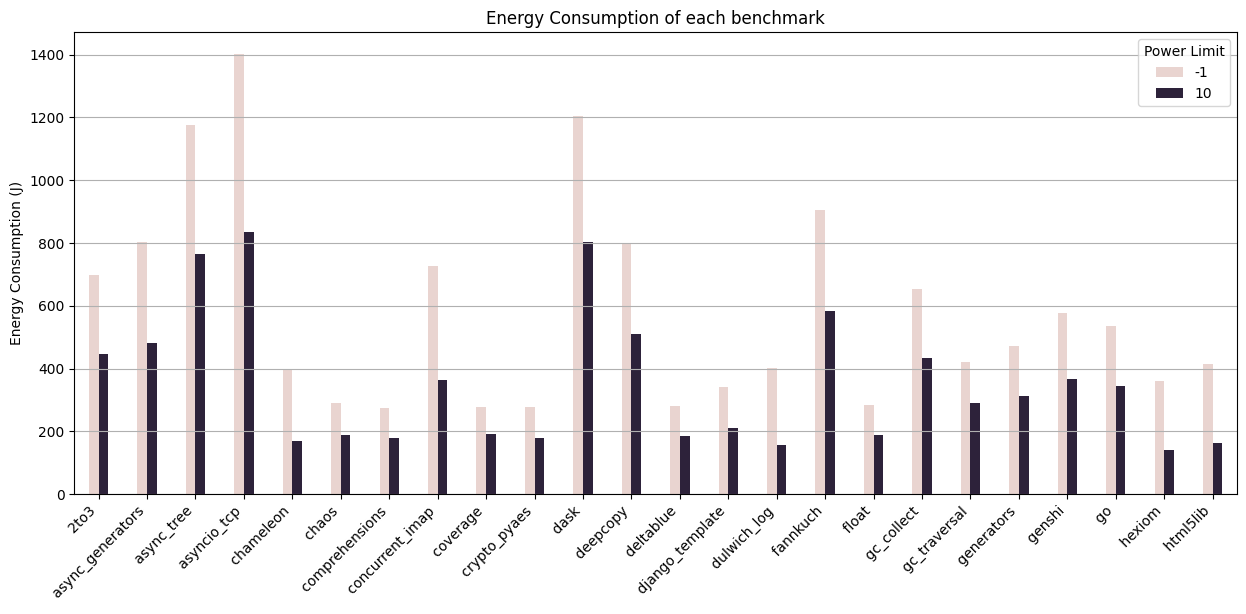

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataCap = pd.read_csv("measurementsGlobalNewWithPowerCap.csv")
dataNoCap = pd.read_csv("measurementsGlobalNewNoPowerCap.csv")
dataNoCap = dataNoCap[dataNoCap["Program"].isin(dataCap["Program"])]
print(dataNoCap[dataNoCap["Program"]=="pprint"])
fullData = pd.concat([dataNoCap, dataCap])

powerconsumed = fullData["Package"]
time = fullData["Time"] / 1000.0
temperature = fullData["Temperature"]
program = fullData["Program"]
pythonVersion = fullData["Language"]
powerLimit = fullData["PowerLimit"]


threshold = 3
df = pd.DataFrame(
    {
        "Program": program,
        "PowerLimit": powerLimit,
        "Temperature": temperature,
        "EnergyConsumption": powerconsumed,
        "Time": time,
        "PythonVersion": pythonVersion,
    }
)

# Recalculate mean after filtering outliers
filtered_df = df[
    (df["Time"].abs() < df["Time"].mean() + threshold * df["Time"].std())
    & (
        df["EnergyConsumption"].abs()
        < df["EnergyConsumption"].mean() + threshold * df["EnergyConsumption"].std()
    )
]

python38 = filtered_df[filtered_df["PythonVersion"]=="Python38"].drop(columns="PythonVersion")
python310 = filtered_df[filtered_df["PythonVersion"]=="Python310"].drop(columns="PythonVersion")
python311 = filtered_df[filtered_df["PythonVersion"]=="Python311"].drop(columns="PythonVersion")


grouped38 = python38.groupby(["Program", "PowerLimit"]).mean().reset_index()
grouped310 = python310.groupby(["Program", "PowerLimit"]).mean().reset_index()
grouped311 = python311.groupby(["Program", "PowerLimit"]).mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=grouped38, x='Program', y='EnergyConsumption', hue='PowerLimit', width=0.4)
plt.title(f"Energy Consumption of each benchmark")
plt.xlabel('')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Energy Consumption (J)')
plt.grid(axis='y')
plt.legend(title='Power Limit')
plt.show()
